In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Absenteeism_data.csv')

In [6]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [8]:
df.drop('ID',axis=1,inplace=True)

In [28]:
a=df['Reason for Absence'].unique()
a.sort()
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [5]:
np.sort(df['Reason for Absence'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [6]:
def group_reason(reason):
    if reason==0:
        return 0
    elif 1<=reason<=14:
        return 1
    elif 15<=reason<=17:
        return 2
    elif 18<=reason<=21:
        return 3
    elif 22<=reason<=28:
        return 4

In [7]:
df_1=df.copy()

In [8]:
df_1['Reason']=df_1['Reason for Absence'].apply(group_reason)

In [9]:
df_1.drop('Reason for Absence',axis=1,inplace=True)

In [10]:
df_1.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,4
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,4


In [11]:
df_1['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [12]:
df_1['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [13]:
df_1['Education']=df_1['Education'].map({1:1,3:2,2:2,4:2})

In [14]:
df_1['Education'].value_counts()

Education
1    583
2    117
Name: count, dtype: int64

In [15]:
df_1.drop('Date',axis=1,inplace=True)

In [16]:
y=df_1['Absenteeism Time in Hours']
X=df_1.drop('Absenteeism Time in Hours',axis=1)

In [17]:
X.columns

Index(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Reason'],
      dtype='object')

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children',
       'Pets']),
        ('cat',OneHotEncoder(),['Reason','Education'])]
)

In [20]:
X_preprocessed=preprocessor.fit_transform(X)

In [47]:
X_preprocessed[0]

array([ 1.00584437,  0.41281584, -0.53606239, -0.80633129,  0.76743118,
        0.88046927,  0.26848661,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, random_state=42)

In [22]:
X_train.shape

(525, 14)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()

In [25]:
model.add(Dense(14,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(28,activation='relu'))
model.add(Dense(56,activation='relu'))
model.add(Dense(112,activation='relu'))
model.add(Dense(56,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [26]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop=EarlyStopping(monitor='val_loss',patience=20)

In [42]:
model.fit(X_train,y_train,epochs=500,shuffle=True,validation_split=0.2,callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 79.6763 - mae: 3.9427 - val_loss: 178.4848 - val_mae: 5.9151
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 81.7949 - mae: 3.9144 - val_loss: 181.0966 - val_mae: 5.9065
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 81.6505 - mae: 4.3810 - val_loss: 185.3641 - val_mae: 6.1189
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 75.5682 - mae: 3.9587 - val_loss: 181.1171 - val_mae: 5.9458
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 71.7788 - mae: 3.9598 - val_loss: 181.1410 - val_mae: 6.0340
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 71.8691 - mae: 3.9451 - val_loss: 186.3241 - val_mae: 6.0784
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 75.9129 - mae: 4.0153 - val_loss: 188.5859 - val_mae: 6.1633
Epoch 8/500
14/14 [==============================] - 0s 5ms/st

In [43]:
df_loss=pd.DataFrame(model.history.history)

In [31]:
df_loss

,loss,mae,val_loss,val_mae
0,201.340073,6.762173,238.053085,7.663796
1,201.063400,6.744213,237.660690,7.641894
2,200.123886,6.684040,235.467957,7.515767
3,195.028931,6.283729,220.990662,6.648263
4,174.686478,5.486442,194.438293,6.500258
5,158.907623,5.477327,191.554428,6.289232
6,154.339447,5.670490,188.742538,6.373305
7,150.127136,5.716767,187.946594,6.318401
8,147.470215,5.475241,187.168671,6.172199
9,144.935776,5.403553,186.565033,6.077593


<Axes: >

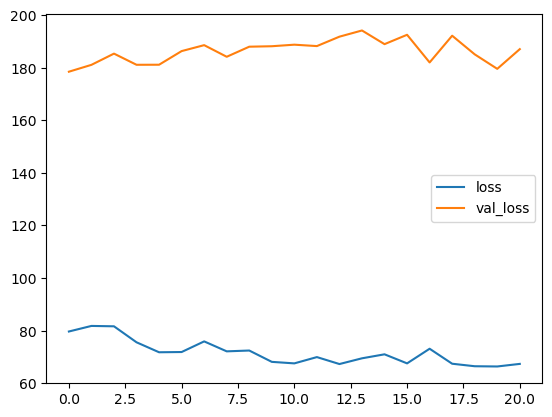

In [44]:
df_loss[['loss','val_loss']].plot()

<Axes: >

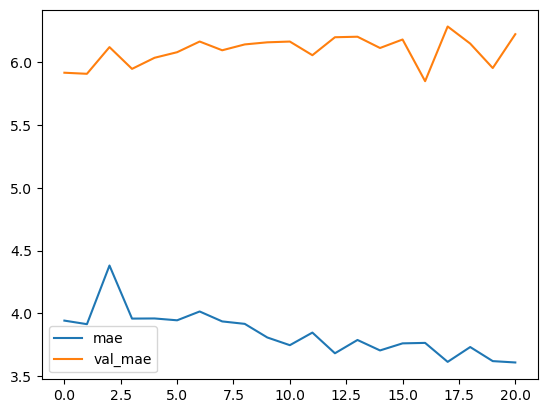

In [45]:
df_loss[['mae','val_mae']].plot()

In [34]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 163.0030 - mae: 4.8252


[163.0030059814453, 4.825226783752441]

In [35]:
predictions=model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [36]:
df_pred=pd.DataFrame(predictions,columns=['Predicted Hours'])

In [37]:
y_test1=y_test.reset_index(drop=True)

In [38]:
y_test1.median()

3.0

In [39]:
df_pred['Originl hours']=y_test1

In [40]:
df_pred

,Predicted Hours,Originl hours
0,2.430077,8
1,1.935536,8
2,1.905845,8
3,3.233885,2
4,2.368820,1
...,...,...
170,2.585714,2
171,17.535513,8
172,5.462594,80
173,1.734413,0


In [41]:
from sklearn.metrics import r2_score

# Predict on the test set
# Calculate R²
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2}")

R² Score: -0.02315370893490054
